In [1]:
from src.main.models.logistic import Logistic
from src.main.utilities.utils import clean_text, stop_words_removal, stemming, tfidf_vectorizer, get_dataset
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#define model and pipeline
logistic = Logistic(verbose=False, multi_class="multinomial", n_jobs=-1, max_iter=1000)
logistic.set_pipeline([clean_text, stop_words_removal, stemming, tfidf_vectorizer])

#import dataset and apply pipeline
inputs, targets = get_dataset()
inputs = logistic.run_pipeline(inputs)

#stratified train test split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42, stratify=targets)
#print(y_train.value_counts(normalize=True) * 100)

In [3]:
#model training 
#logistic.grid_search(x_train, y_train, n_iter=1)
logistic.fit(x_train, y_train)


In [4]:
#model predictions
y_pred = logistic.predict(x_test)

results = logistic.compute_performance(y_test, y_pred)
logistic.print_performance(results)


Accuracy :  0.8586012564671102
f1-macro :  0.792851057640285
Precision :  0.8404017938442555
Recall :  0.7623210397958783


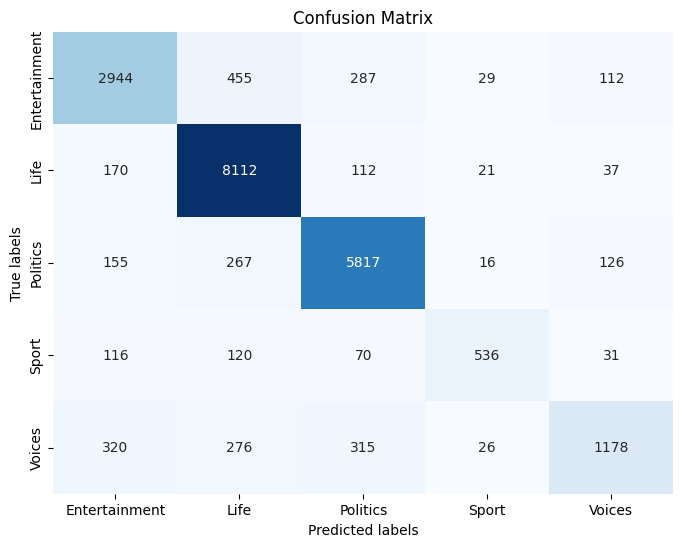

In [5]:
logistic.plot_confusion_matrix(y_test, y_pred)

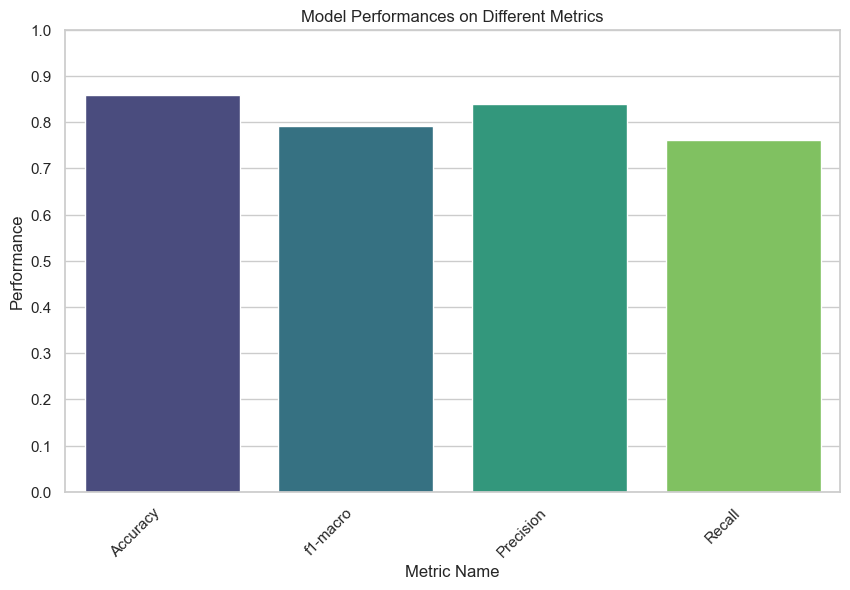

In [6]:
logistic.plot_performance(results)

In [7]:
import sklearn.metrics as metrics
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',